In [50]:
# Import
import  pandas as pd
import datetime

In [62]:
# Loading data
df = pd.read_csv('resources/data.csv', sep=',', parse_dates=['device_local_date'])
df = df.set_index(['device_local_date'])
print(df.keys())

Index(['shopping_center_id', 'device_hash_id'], dtype='object')


In [92]:
# Group data by shopping center id, weekday and frequency of one minute
week_group = df.groupby([df.index.weekday, pd.Grouper(freq="60S"), 'shopping_center_id'])
for name, group in week_group:
    print(name)
    print(group)

device_local_date  device_local_date    shopping_center_id                  
0                  2019-09-02 02:18:00  599cb959-11ef-49aa-9eb3-e6c17b4ea6ba    1
                   2019-09-02 02:28:00  599cb959-11ef-49aa-9eb3-e6c17b4ea6ba    1
                   2019-09-02 02:38:00  599cb959-11ef-49aa-9eb3-e6c17b4ea6ba    1
                   2019-09-02 02:41:00  599cb959-11ef-49aa-9eb3-e6c17b4ea6ba    1
                   2019-09-02 02:51:00  599cb959-11ef-49aa-9eb3-e6c17b4ea6ba    1
                                                                               ..
6                  2019-09-15 20:54:00  599cb959-11ef-49aa-9eb3-e6c17b4ea6ba    1
                   2019-09-15 21:20:00  599cb959-11ef-49aa-9eb3-e6c17b4ea6ba    2
                   2019-09-15 21:21:00  599cb959-11ef-49aa-9eb3-e6c17b4ea6ba    2
                   2019-09-15 21:31:00  599cb959-11ef-49aa-9eb3-e6c17b4ea6ba    1
                   2019-09-15 22:58:00  cb2d5bb6-c372-4a51-8231-4ffa288a0c28    1
Name: device_hash_id,

In [ ]:
# Count number of dvice per group
number_of_device_per_group = week_group['device_hash_id'].count()
print(number_of_device_per_group)

In [ ]:
#TODO : Plot per shopping center and per a day of a week


In [ ]:
df['date'] = pd.to_datetime(df['device_local_date'].dt.date)
date = str(datetime.datetime.strptime('2022-03-05', '%Y-%m-%d').date())
df['time'] = pd.to_datetime(date + " " + df['device_local_date'].dt.time.astype(str))
df['weekday'] = df['device_local_date'].dt.weekday
df.set_index('time')

In [21]:
#
df.sort_values(['device_local_date']).groupby(['device_hash_id', 'weekday'])['device_local_date'].last()

device_hash_id  weekday
0.00E+00        4         2019-09-13 19:34:27
000a7a5fe9      4         2019-09-06 18:17:50
                5         2019-09-07 16:56:41
000d783b1a      1         2019-09-17 20:59:18
0016ad7e8f      5         2019-09-07 15:33:35
                                  ...        
ffe0f766cb      1         2019-09-03 16:13:53
                4         2019-09-13 19:48:24
ffe5628a16      5         2019-09-14 12:43:39
fff2d6eaa9      4         2019-09-13 18:58:43
                5         2019-09-14 19:10:46
Name: device_local_date, Length: 7862, dtype: datetime64[ns]

In [46]:
df_monday = df[df['weekday']==0]

<AxesSubplot:xlabel='device_hash_id'>

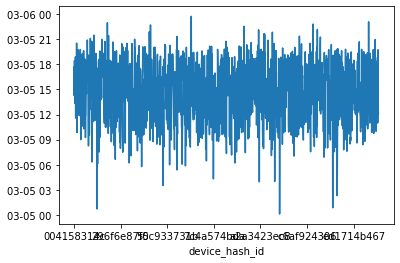

In [49]:
#
df_monday.sort_values(['device_local_date']).groupby(['device_hash_id'])['time'].first().plot()

In [48]:
df.sort_values(['device_local_date']).groupby(['weekday'])['weekday'].unique()

weekday
0    [0]
1    [1]
2    [2]
3    [3]
4    [4]
5    [5]
6    [6]
Name: weekday, dtype: object

In [40]:
now = df['device_local_date'].now()

AttributeError: 'Series' object has no attribute 'now'